In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('../sample_data/pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.shape

(768, 10)

In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
columns_to_normalize = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [10]:
diabetes[columns_to_normalize] = diabetes[cols_to_normalize].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

In [11]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [12]:
import tensorflow as tf

In [13]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
# assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
#     'Group',
#     ['A', 'B', 'C', 'D']
# )

Hash Bucket is a good option if we don't know / don't want to write out all the categories

In [15]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket(
    'Group',
    hash_bucket_size=4
)

Feature engineering: convert a numerical column to a categorical column:

In [20]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

Let's visualize the distribution of ages:

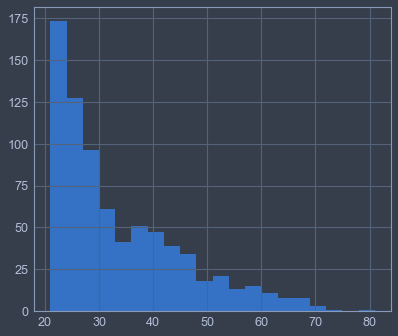

In [23]:
diabetes['Age'].hist(bins=20)

In [24]:
age_bucket = tf.feature_column.bucketized_column(
    age,
    boundaries=[20,30,40,50,60,70,80]
)

In [26]:
feat_cols = [
    num_preg,
    plasma_gluc,
    dias_press,
    tricep,
    insulin,
    bmi,
    diabetes_pedigree,
    assigned_group,
    age_bucket
]

Let's rip out the Lables:

In [33]:
x_data = diabetes.drop('Class', axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [34]:
lables = diabetes['Class']
lables.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_data, lables)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 9) (192, 9) (576,) (192,)


In [43]:
input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=10,
    num_epochs=1000,
    shuffle=True
)

In [44]:
model = tf.estimator.LinearClassifier(
    feature_columns=feat_cols,
    n_classes=2
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpwz130z4t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1300c9a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [45]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpwz130z4t/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 251.962
INFO:tensorflow:loss = 4.5917635, step = 101 (0.398 sec)
INFO:tensorflow:global_step/sec: 421.928
INFO:tensorflow:loss = 5.8835316, step = 201 (

In [47]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

In [48]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-13T21:05:57Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpwz130z4t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-13-21:05:58
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8020833, accuracy_baseline = 0.6458334, auc = 0.8378202, auc_precision_recall = 0.7080724, average_loss = 0.50733215, global_step = 1000, label/mean = 0.35416666, loss = 4.870389, precision = 0.7586207, prediction/mean = 0.37419745, recall = 0.64705884
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/rg/q

In [50]:
results

{'accuracy': 0.8020833,
 'accuracy_baseline': 0.6458334,
 'auc': 0.8378202,
 'auc_precision_recall': 0.7080724,
 'average_loss': 0.50733215,
 'label/mean': 0.35416666,
 'loss': 4.870389,
 'precision': 0.7586207,
 'prediction/mean': 0.37419745,
 'recall': 0.64705884,
 'global_step': 1000}

In [51]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

In [52]:
predictions = list(model.predict(pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpwz130z4t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [57]:
pd.DataFrame(predictions).head()

,class_ids,classes,logistic,logits,probabilities
0,[0],[b'0'],[0.46749046],[-0.1302219],"[0.53250957, 0.46749046]"
1,[0],[b'0'],[0.27649316],[-0.96192384],"[0.7235068, 0.27649316]"
2,[1],[b'1'],[0.71143246],[0.9023513],"[0.28856754, 0.71143246]"
3,[1],[b'1'],[0.6807809],[0.7573629],"[0.31921908, 0.6807809]"
4,[0],[b'0'],[0.40174463],[-0.3982011],"[0.5982554, 0.40174463]"


Using a Dense Neural Network instead of a `LinearClassifier`:

In [62]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [66]:
dnn_feat_cols = [
    num_preg,
    plasma_gluc,
    dias_press,
    tricep,
    insulin,
    bmi,
    diabetes_pedigree,
    embedded_group_col, # Change this
    age_bucket
]

In [67]:
input_func = tf.estimator.inputs.pandas_input_fn(
    X_train,
    y_train,
    batch_size=10,
    num_epochs=1000,
    shuffle=True
)

In [68]:
dnn_model = tf.estimator.DNNClassifier(
    hidden_units=[10,10,10], # 3 hidden layers each with 10 neurons
    feature_columns=dnn_feat_cols,
    n_classes=2
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpnlphualf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x131aba5f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [69]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpnlphualf/model.ckpt.
INFO:tensorflow:loss = 6.3381753, step = 1
INFO:tensorflow:global_step/sec: 255.193
INFO:tensorflow:loss = 6.2238708, step = 101 (0.390 sec)
INFO:tensorflow:global_step/sec: 351.748
INFO:tensorflow:loss = 4.2541213, step = 201 (0.288 sec)
INFO:tensorflow:global_step/sec: 335.393
INFO:tensorflow:loss = 4.617727, step = 301 (0.297 sec)
INFO:tensorflow:global_step/sec: 368.643
INFO:tensorflow:loss = 4.207014, step = 401 (0.273 sec)
INFO:tensorflow:global_step/sec: 383.01

In [70]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

In [71]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-13T21:29:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpnlphualf/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-13-21:29:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8072917, accuracy_baseline = 0.6458334, auc = 0.8551352, auc_precision_recall = 0.72605425, average_loss = 0.45827806, global_step = 1000, label/mean = 0.35416666, loss = 4.3994694, precision = 0.7719298, prediction/mean = 0.3017312, recall = 0.64705884
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/rg/qlb5htps7fg440bjyl_5vztc0000gn/T/tmpnlphualf/model.ckpt-1000


{'accuracy': 0.8072917,
 'accuracy_baseline': 0.6458334,
 'auc': 0.8551352,
 'auc_precision_recall': 0.72605425,
 'average_loss': 0.45827806,
 'label/mean': 0.35416666,
 'loss': 4.3994694,
 'precision': 0.7719298,
 'prediction/mean': 0.3017312,
 'recall': 0.64705884,
 'global_step': 1000}